In [1]:
import sys
print(sys.executable)


c:\Users\enjoy\anaconda3\envs\br2\python.exe


| 센서 번호      | 변수명            | 측정 항목 (한글)   | 수명 예측 관련 설명                                |
| ---------- | -------------- | ------------ | ------------------------------------------ |
| sensor\_1  | T2             | 팬 입구 총온도     | 외기 온도로, 엔진 부하 변화 시 영향을 받으며 열 환경 조건을 반영함    |
| sensor\_2  | P2             | 팬 입구 압력      | 외부 대기압과 유사하여 변동이 거의 없어 예측 변수로는 중요도가 낮음     |
| sensor\_3  | Ps30           | 바이패스 덕트 압력   | 엔진 부하 상태를 간접적으로 반영하며, 공기 흐름 이상 탐지에 활용 가능   |
| sensor\_4  | Nf             | 고압 터빈 축 회전속도 | 내부 회전체 핵심 축의 속도이며, 감쇠 패턴이 고장 예측에 밀접하게 연결됨  |
| sensor\_5  | Nc             | 저압 터빈 축 회전속도 | 외부 팬 및 압축기 속도와 연결되어, 저하 시 마모나 손실을 반영함      |
| sensor\_6  | T50            | 저압 터빈 출구 온도  | 열 축적 또는 과열 상태를 파악할 수 있으며, 장기적으로 수명 저하와 연결됨 |
| sensor\_7  | T24            | 고압 압축기 출구 온도 | 압축기 효율 변화 및 마찰 발생 여부를 간접적으로 판단할 수 있음       |
| sensor\_8  | Ps24           | 고압 압축기 출구 정압 | 고압 압축기 성능을 판단하는 핵심 변수로, 압력 저하는 이상 징후일 수 있음 |
| sensor\_9  | P15            | 팬 입구 정압      | 외기 조건에 민감하고 대부분 일정하여 예측 기여도가 낮음            |
| sensor\_10 | T30            | 고압 압축기 입구 온도 | 압축기 투입 직전 공기의 온도로, 엔진 내부 온도 상승 시 중요한 신호가 됨 |
| sensor\_11 | T40            | 고압 터빈 입구 온도  | 전체 시스템 내 가장 고온 구간 중 하나로, 과열 시 부품 손상 위험 존재  |
| sensor\_12 | P2t            | 팬 입구 총압      | 공기 유입 성능이나 흡입 이상 감지를 위한 보조 변수              |
| sensor\_13 | Ps3            | 저압 압축기 출구 정압 | 압축 성능 저하 또는 셔터 고장 여부 진단에 활용됨               |
| sensor\_14 | T3             | 저압 압축기 출구 온도 | 열효율 변화를 반영하며, 비정상 상승 시 결함 가능성 있음           |
| sensor\_15 | P30            | 고압 압축기 출구 총압 | 전체 압축기 성능을 반영하는 주요 변수로, 수명 예측에서 중요도 매우 높음  |
| sensor\_16 | T\_fan\_ratio  | 팬 온도 비율      | 팬 전후 온도 비로, 팬 성능 감쇠 또는 마찰 발생 시 변화          |
| sensor\_17 | P\_fan\_ratio  | 팬 압력 비율      | 팬의 압축 능력 저하를 나타낼 수 있으며, 성능 저하 탐지에 효과적      |
| sensor\_18 | BPR            | 바이패스 비율      | 엔진 구조 특성상 일정하게 유지되어 변수로서 중요도 낮음            |
| sensor\_19 | FAR\_B         | 연료-공기 혼합비    | 연소 효율과 직결되며, 비정상 수치는 열 환경 악화 및 고장 원인 가능    |
| sensor\_20 | HtBleed        | 블리드 엔탈피      | 엔진 내부 에너지 손실을 반영하며, 부하 증가 또는 누설 가능성을 시사함   |
| sensor\_21 | Coolant\_bleed | 고압 터빈 냉각 블리드 | 냉각 실패 시 온도 상승으로 연결되어, 열 관련 고장 예방 판단에 유용    |


In [ ]:
import pandas as pd

train_path = r"C:\Users\enjoy\Downloads\bearing\CMaps\train_FD001.txt"  #데이터는 고장까지 "끝까지" 기록된 시계열 데이터
test_path = r"C:\Users\enjoy\Downloads\bearing\CMaps\test_FD001.txt"  #고장 직전까지 기록된 시계열 데이터
rul_path = r"C:\Users\enjoy\Downloads\bearing\CMaps\RUL_FD001.txt"   #고장까지 남은 정답값(label)

# 열 이름 정의 (sensor1 ~ sensor23까지 총 26개 컬럼)
columns = ["id", "cycle", "op1", "op2", "op3"] + [f"sensor{i}" for i in range(1, 22)]
#op1,op2,op3는 작동조건

# 데이터 불러오기
train = pd.read_csv(train_path, sep="\s+", header=None, names=columns)
test = pd.read_csv(test_path, sep="\s+", header=None, names=columns)
rul = pd.read_csv(rul_path, sep="\s+", header=None, names=["RUL"])

#  결과 확인
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print(train.head())


Train shape: (20631, 26)
Test shape: (13096, 26)
   id  cycle     op1     op2    op3  sensor1  sensor2  sensor3  sensor4  \
0   1      1 -0.0007 -0.0004  100.0   518.67   641.82  1589.70  1400.60   
1   1      2  0.0019 -0.0003  100.0   518.67   642.15  1591.82  1403.14   
2   1      3 -0.0043  0.0003  100.0   518.67   642.35  1587.99  1404.20   
3   1      4  0.0007  0.0000  100.0   518.67   642.35  1582.79  1401.87   
4   1      5 -0.0019 -0.0002  100.0   518.67   642.37  1582.85  1406.22   

   sensor5  ...  sensor12  sensor13  sensor14  sensor15  sensor16  sensor17  \
0    14.62  ...    521.66   2388.02   8138.62    8.4195      0.03       392   
1    14.62  ...    522.28   2388.07   8131.49    8.4318      0.03       392   
2    14.62  ...    522.42   2388.03   8133.23    8.4178      0.03       390   
3    14.62  ...    522.86   2388.08   8133.83    8.3682      0.03       392   
4    14.62  ...    522.19   2388.04   8133.80    8.4294      0.03       393   

   sensor18  sensor19  se

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   op1       20631 non-null  float64
 3   op2       20631 non-null  float64
 4   op3       20631 non-null  float64
 5   sensor1   20631 non-null  float64
 6   sensor2   20631 non-null  float64
 7   sensor3   20631 non-null  float64
 8   sensor4   20631 non-null  float64
 9   sensor5   20631 non-null  float64
 10  sensor6   20631 non-null  float64
 11  sensor7   20631 non-null  float64
 12  sensor8   20631 non-null  float64
 13  sensor9   20631 non-null  float64
 14  sensor10  20631 non-null  float64
 15  sensor11  20631 non-null  float64
 16  sensor12  20631 non-null  float64
 17  sensor13  20631 non-null  float64
 18  sensor14  20631 non-null  float64
 19  sensor15  20631 non-null  float64
 20  sensor16  20631 non-null  fl

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13096 non-null  int64  
 1   cycle     13096 non-null  int64  
 2   op1       13096 non-null  float64
 3   op2       13096 non-null  float64
 4   op3       13096 non-null  float64
 5   sensor1   13096 non-null  float64
 6   sensor2   13096 non-null  float64
 7   sensor3   13096 non-null  float64
 8   sensor4   13096 non-null  float64
 9   sensor5   13096 non-null  float64
 10  sensor6   13096 non-null  float64
 11  sensor7   13096 non-null  float64
 12  sensor8   13096 non-null  float64
 13  sensor9   13096 non-null  float64
 14  sensor10  13096 non-null  float64
 15  sensor11  13096 non-null  float64
 16  sensor12  13096 non-null  float64
 17  sensor13  13096 non-null  float64
 18  sensor14  13096 non-null  float64
 19  sensor15  13096 non-null  float64
 20  sensor16  13096 non-null  fl

In [13]:
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [15]:
train.describe()


,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [32]:
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


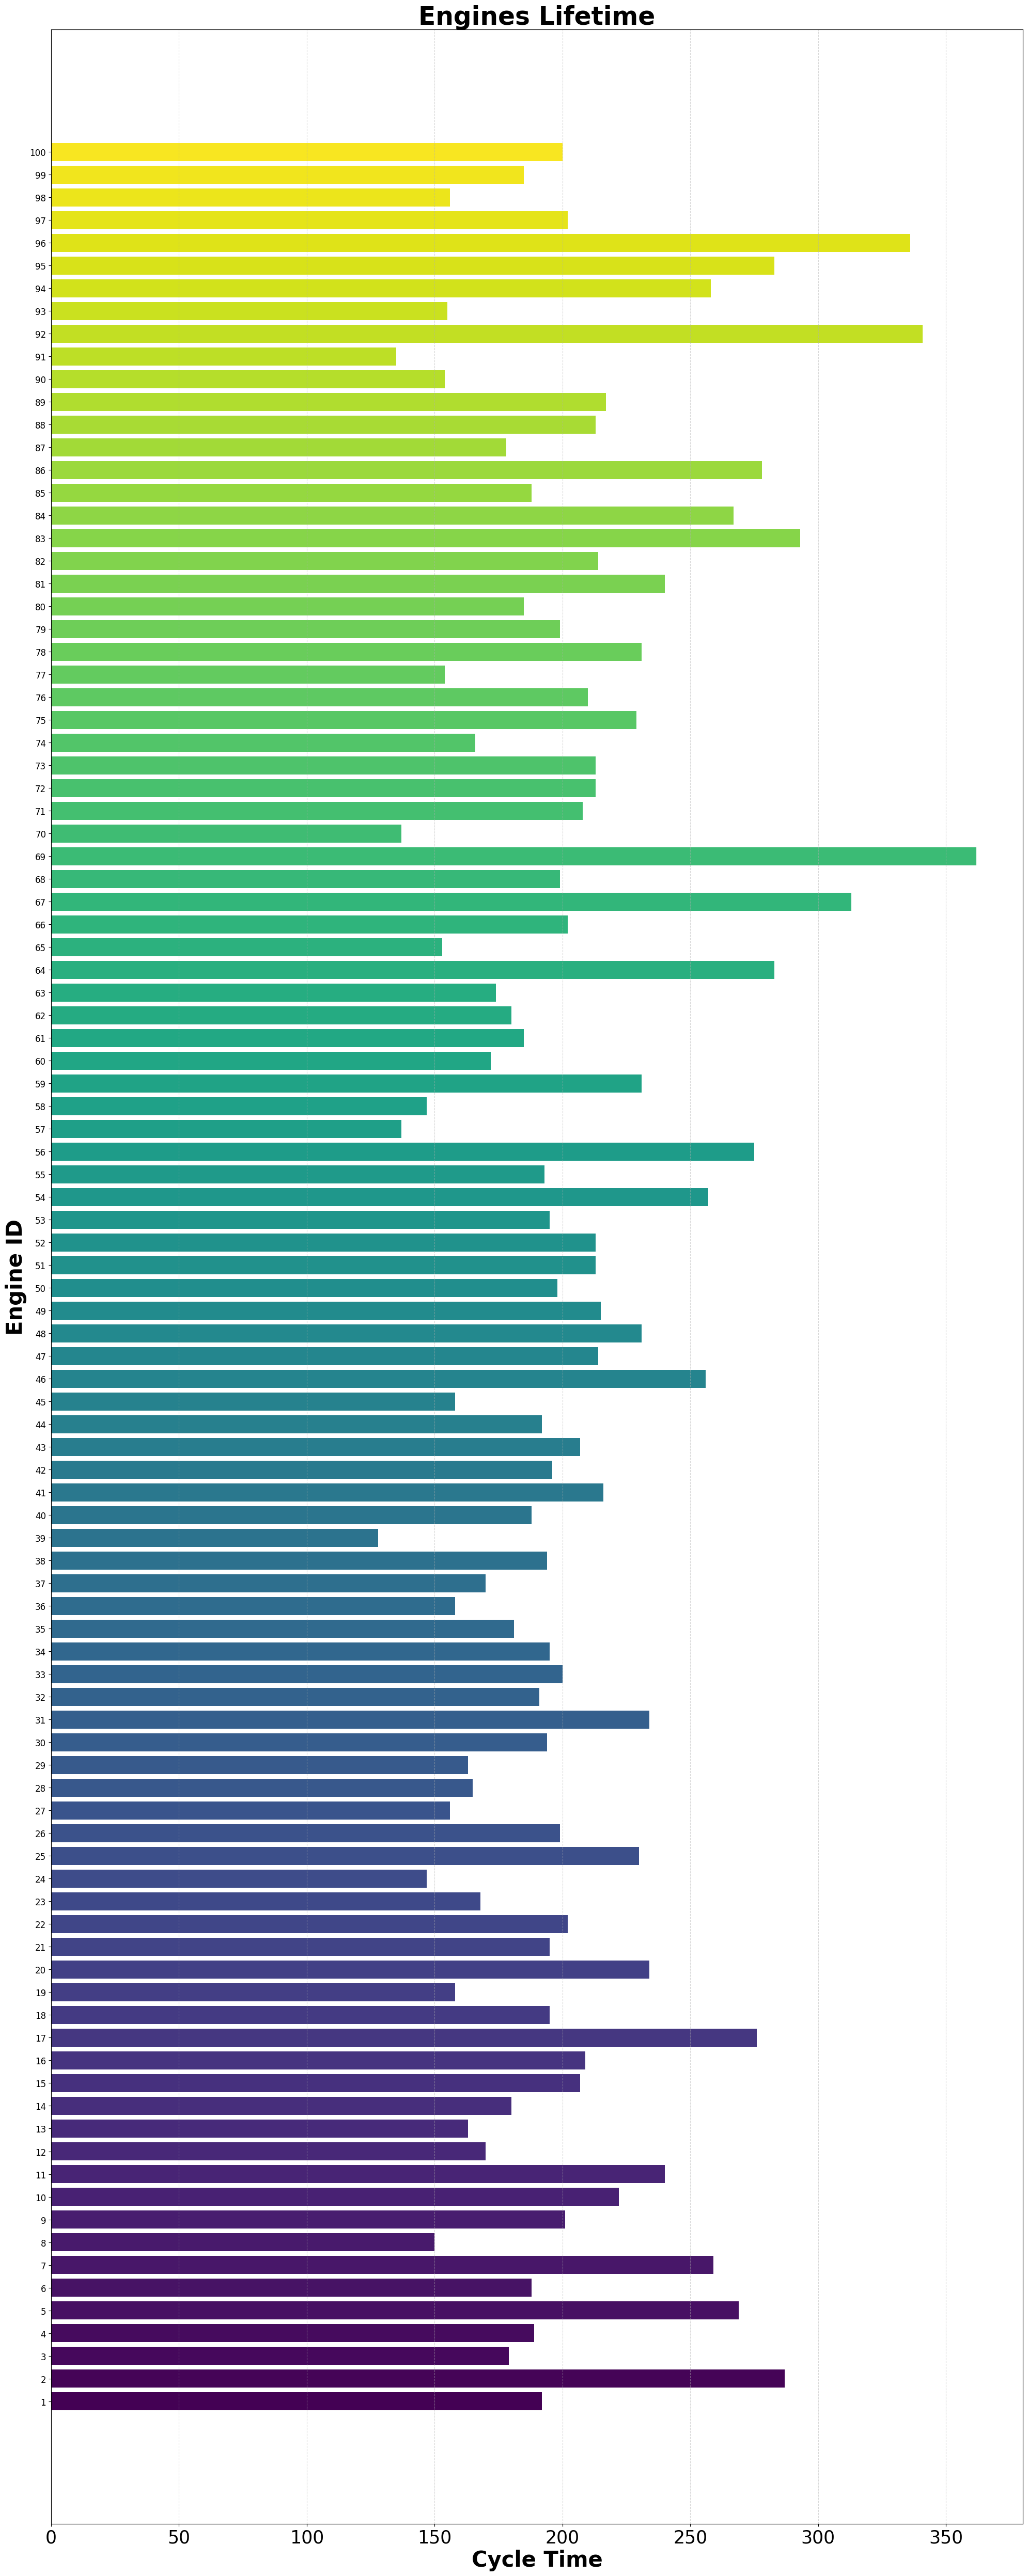

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 유닛별 최대 cycle 수 계산
engine_life = train.groupby('id')['cycle'].max().reset_index()
engine_life.columns = ['Engine ID', 'Lifetime']

# 정렬 (ID 순서)
engine_life.sort_values('Engine ID', inplace=True)
num_units = len(engine_life)

# 연속형 컬러맵 적용
cmap = plt.get_cmap('viridis')  # 'plasma', 'turbo'도 가능
colors = [cmap(i / num_units) for i in range(num_units)]

# 그래프
plt.style.use('default')
plt.figure(figsize=(20, 50))
bars = plt.barh(
    y=engine_life['Engine ID'],
    width=engine_life['Lifetime'],
    color=colors
)

# 모든 유닛 ID를 y축에 표시
plt.yticks(
    ticks=engine_life['Engine ID'],
    labels=engine_life['Engine ID'],
    fontsize=12
)

# 제목 및 레이블
plt.title('Engines Lifetime', fontweight='bold', fontsize=35)
plt.xlabel('Cycle Time', fontweight='bold', fontsize=30)
plt.ylabel('Engine ID', fontweight='bold', fontsize=30)
plt.xticks(fontsize=25)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#유닛 수: 전체 엔진 개수 (예: 100대)
#사이클 수: 각 엔진이 고장 나기까지 몇 번 작동했는지 (예: 유닛 1은 192회, 유닛 2는 287회 등)


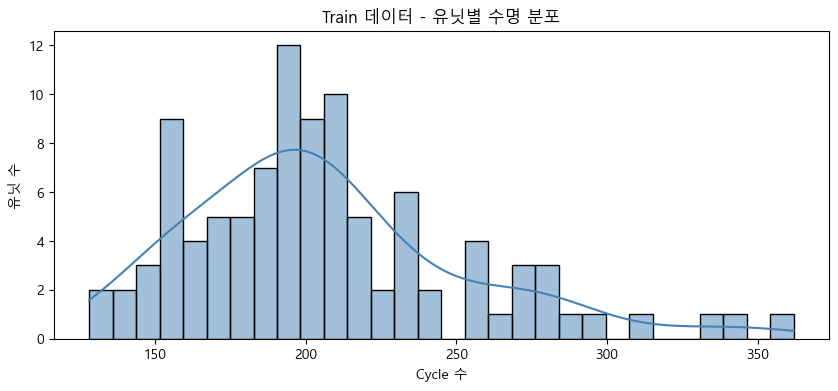

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 유닛별 수명 (고장 시점)
unit_life = train.groupby('id')['cycle'].max().reset_index()

plt.figure(figsize=(10, 4))
sns.histplot(unit_life['cycle'], bins=30, kde=True, color='steelblue')
plt.title('Train 데이터 - 유닛별 수명 분포')
plt.xlabel('Cycle 수')
plt.ylabel('유닛 수')
plt.show()
#많은 유닛이 약 200 cycle 전후에서 고장 발생

### 센서별 시계열 패턴 확인

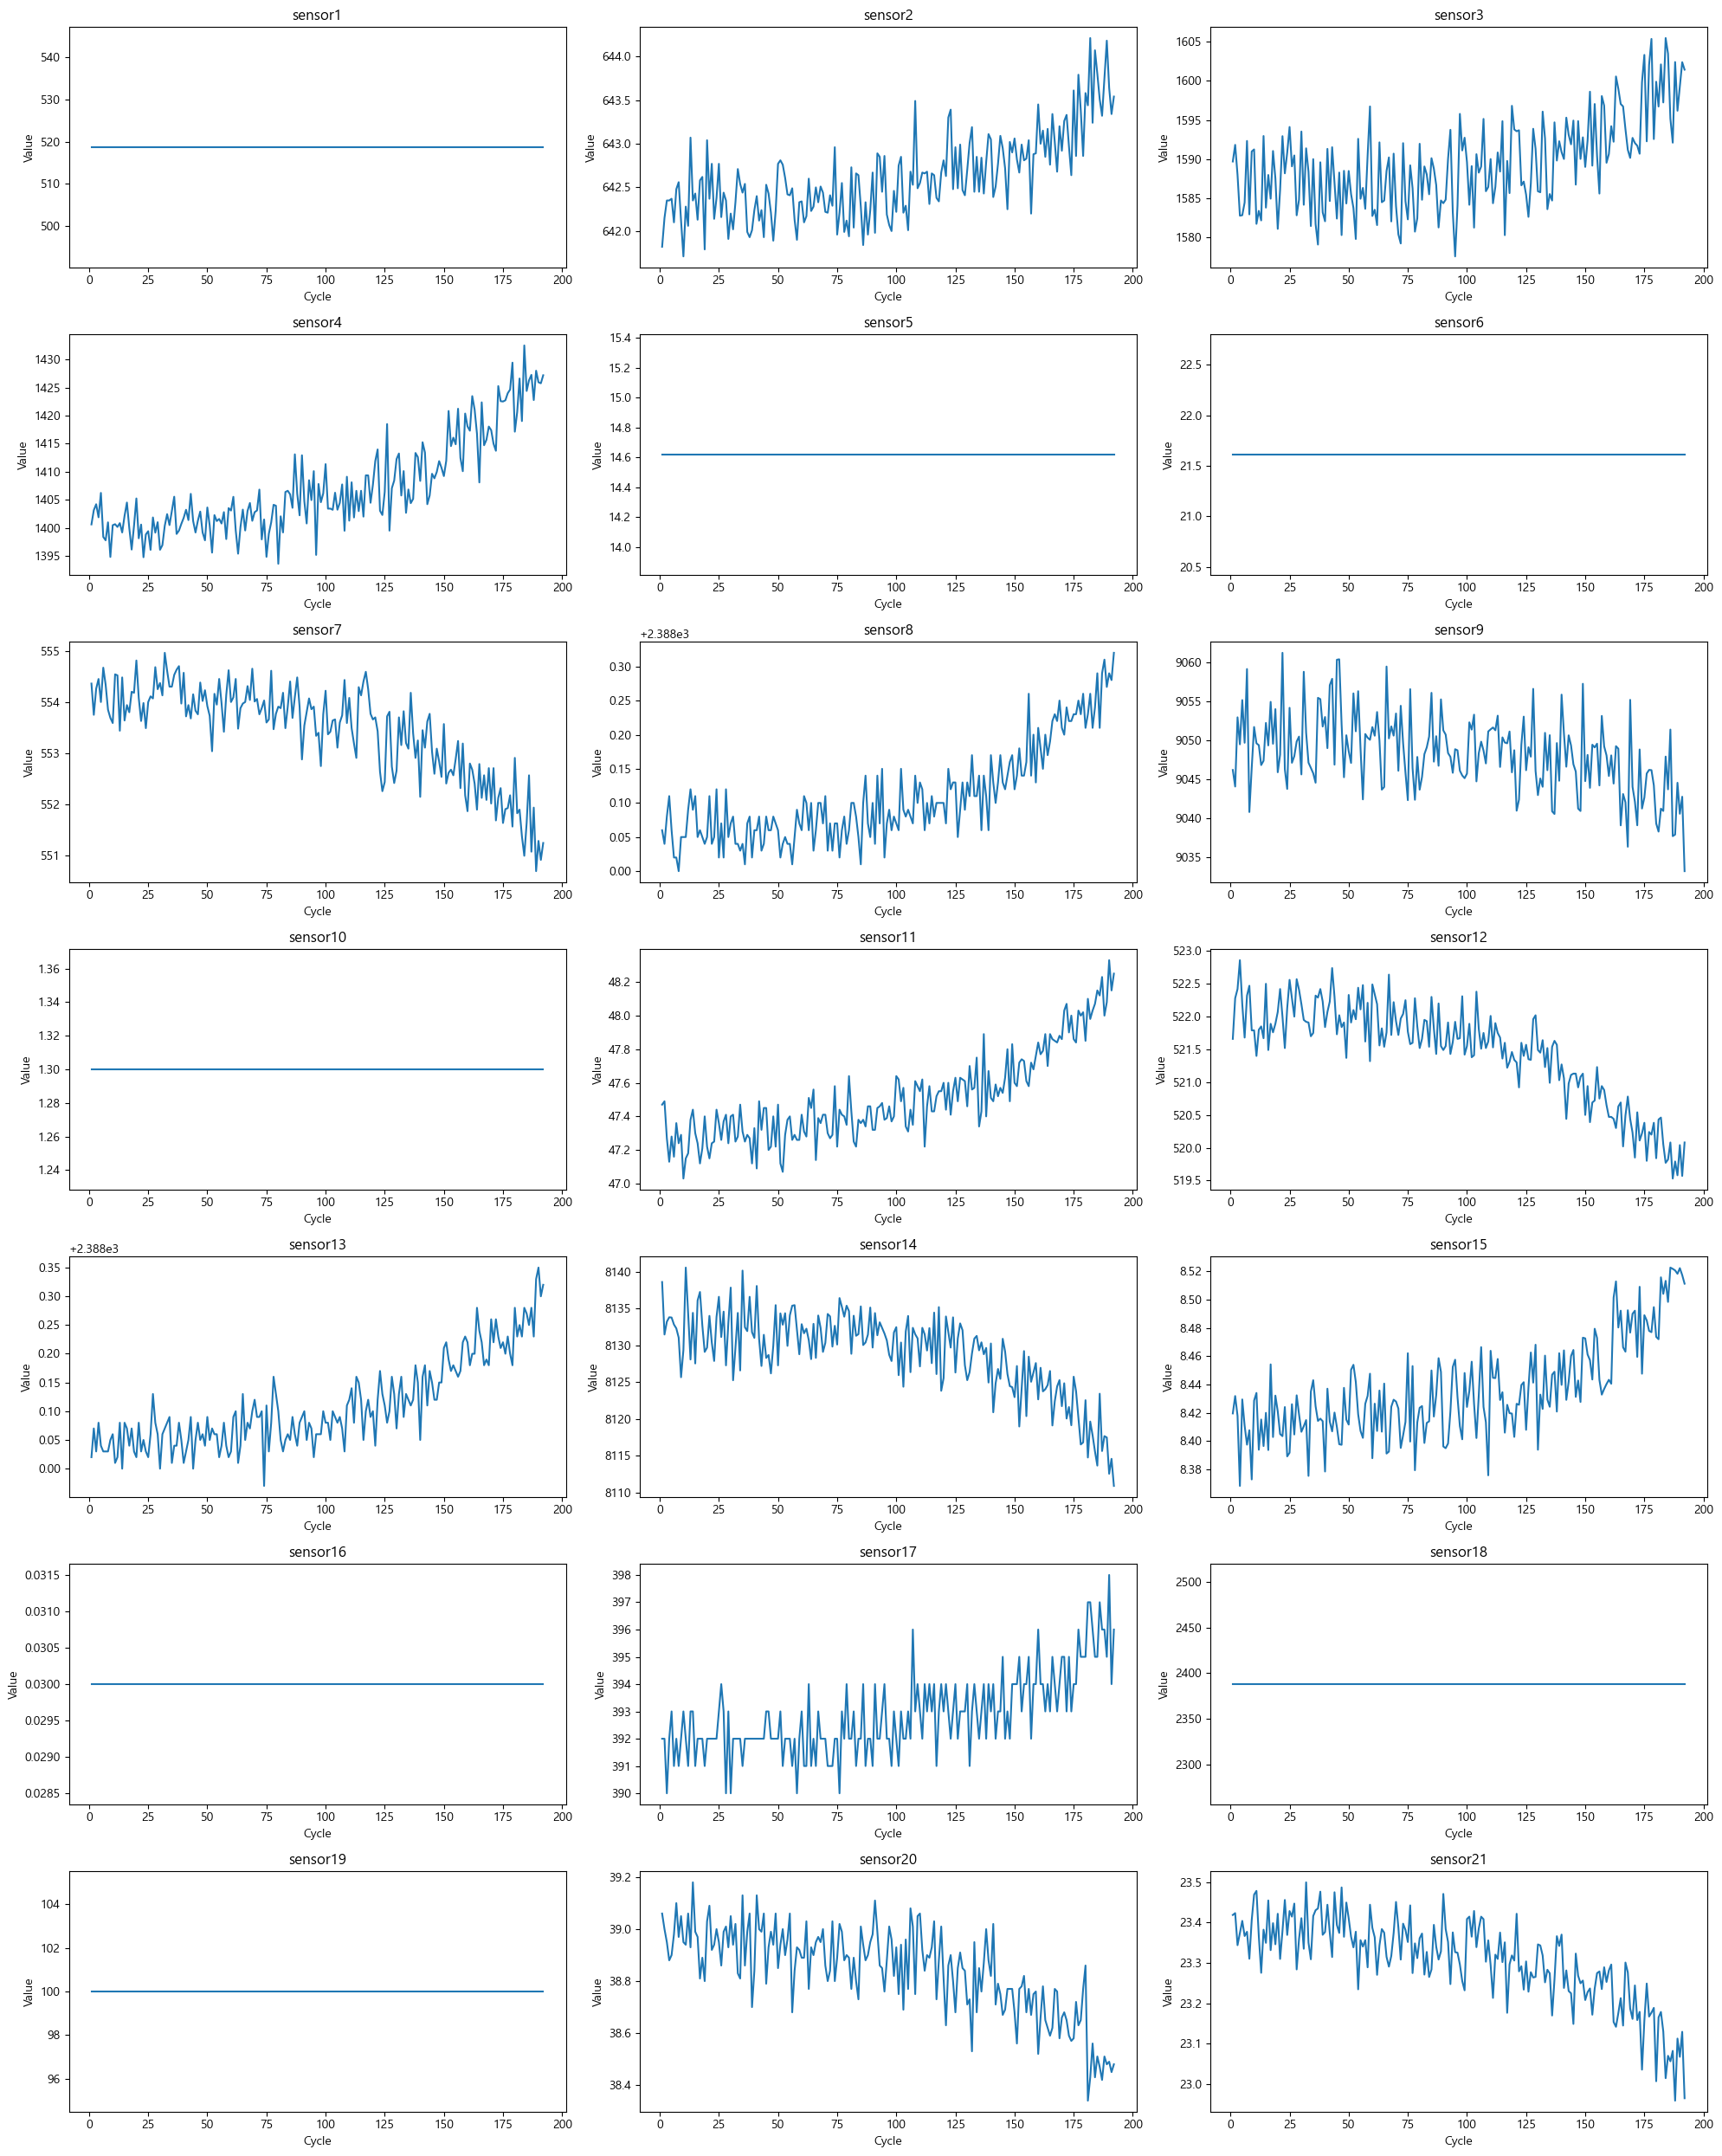

In [ ]:

import matplotlib.pyplot as plt

# 센서 컬럼만 추출
sensor_cols = [col for col in train.columns if col.startswith('sensor')]
unit = 1  # 유닛 번호

plt.figure(figsize=(20, 25))
for i, col in enumerate(sensor_cols):
    plt.subplot(7, 3, i+1)
    plt.plot(train[train['id'] == unit]['cycle'], train[train['id'] == unit][col])
    plt.title(col)
    plt.xlabel('Cycle')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

#거의 수평이거나 노이즈성 변동만 있는 센서는 제거 대상

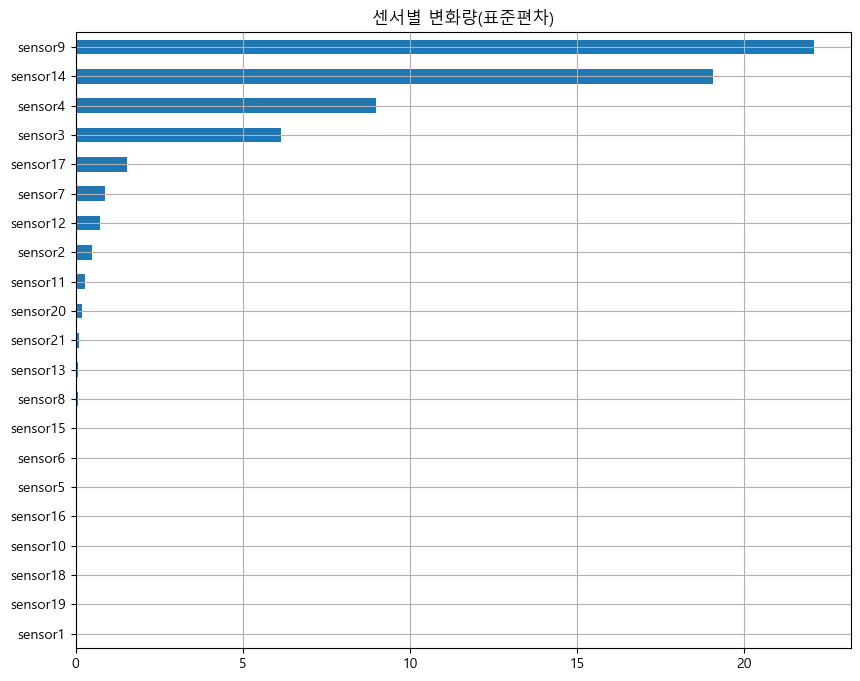

In [ ]:
# 센서별 표준편차 (표준편차가 작은 센서를 제거)
sensor_std = train.drop(['id', 'cycle', 'op1', 'op2', 'op3'], axis=1).std().sort_values()
sensor_std.plot(kind='barh', figsize=(10, 8), title='센서별 변화량(표준편차)')
plt.grid(True)
plt.show()

#잔여 수명(RUL) 예측은 센서가 시간이 지남에 따라 고장에 가까워지면서 어떤 변화를 보이는가를 학습하는 문제
#표준편차가 거의 없는 센서는 시간이 지나도 값이 거의 변하지 않기 때문에 고장 전후 차이가 거의 없어서 제거 대상


In [ ]:
# 센서 제거 기준은 train에서만 수행
low_variance_sensors = ['sensor1', 'sensor5', 'sensor6', 'sensor8', 'sensor10', 
                        'sensor11', 'sensor13', 'sensor15', 'sensor16', 'sensor18',
                        'sensor19', 'sensor20', 'sensor21']  #13개 센서 제거 

selected_features = [col for col in train.columns if col.startswith('sensor') and col not in low_variance_sensors]

# train/test에 동일하게 적용
train_selected = train[['id', 'cycle', 'op1', 'op2', 'op3'] + selected_features]
test_selected = test[['id', 'cycle', 'op1', 'op2', 'op3'] + selected_features]


In [44]:
train.columns

Index(['id', 'cycle', 'op1', 'op2', 'op3', 'sensor1', 'sensor2', 'sensor3',
       'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9',
       'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
       'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21'],
      dtype='object')

In [45]:
test.columns

Index(['id', 'cycle', 'op1', 'op2', 'op3', 'sensor1', 'sensor2', 'sensor3',
       'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9',
       'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
       'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21'],
      dtype='object')

## MinMaxScaler 적용
- 각 센서의 단위와 스케일이 크게 다르고, RUL 예측은 센서값의 절대 크기와 경향성이 중요하므로, 분산 기준 표준화(StandardScaler)는 부적합
- 0~1 범위로 전체 스케일을 맞추는 MinMaxScaler가 LSTM 등 시계열 모델에 더 안정적으로 작동
- 시계열 데이터에서는 센서값의 절대적 변화 흐름을 학습하는 것이 중요하므로 MinMax 정규화가 더 적합

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = train_selected.copy()
test_scaled = test_selected.copy()

train_scaled[selected_features] = scaler.fit_transform(train_selected[selected_features])
test_scaled[selected_features] = scaler.transform(test_selected[selected_features])


In [47]:
#센서별 값 분포 확인
train_scaled[selected_features].describe()


,sensor2,sensor3,sensor4,sensor7,sensor9,sensor12,sensor14,sensor17
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,0.443052,0.424746,0.450435,0.566459,0.195248,0.580697,0.226095,0.434221
std,0.150618,0.133664,0.151935,0.142527,0.099089,0.157261,0.098442,0.129064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.335843,0.331807,0.339467,0.476651,0.140761,0.484009,0.171870,0.333333
50%,0.430723,0.415522,0.435348,0.578100,0.174684,0.594883,0.209516,0.416667
75%,0.539157,0.508829,0.545324,0.669887,0.213991,0.695096,0.249613,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


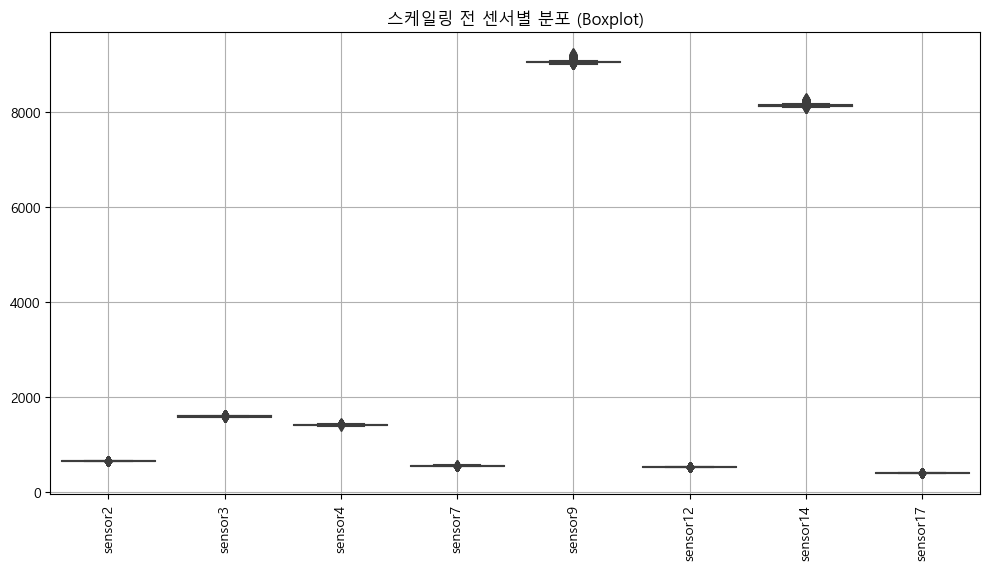

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스케일링 전 데이터 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_selected[selected_features])
plt.xticks(rotation=90)
plt.title("스케일링 전 센서별 분포 (Boxplot)")
plt.grid(True)
plt.show()

# 센서 간 측정 단위와 범위가 크게 상이하여 모델 학습시 특정 센서 값이 모델에 과도하게 영향을 줄 수 있기 때문에 스케일링 적용해야 함

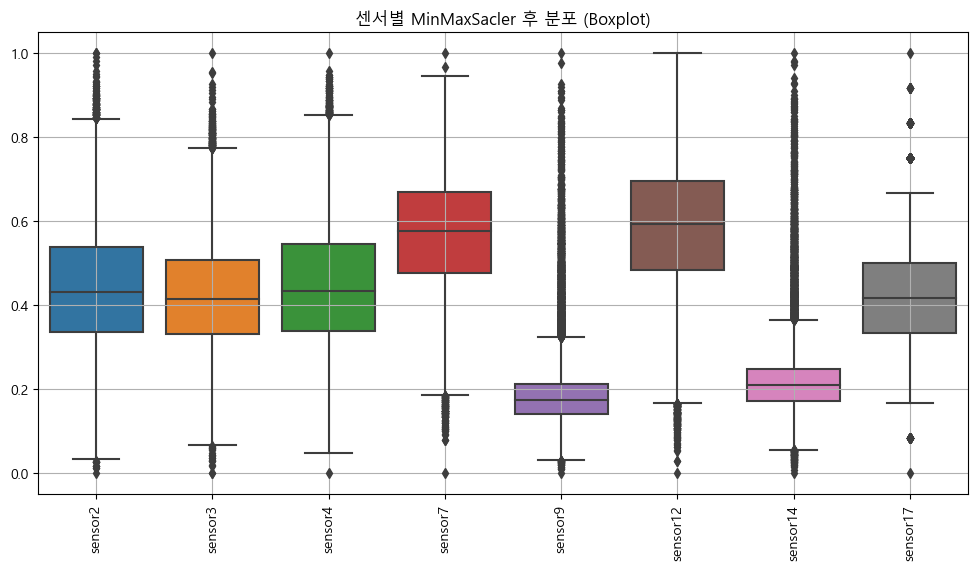

In [ ]:
# train 데이터 MinMaxScaler 적용
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_scaled[selected_features])
plt.xticks(rotation=90)
plt.title("센서별 MinMaxSacler 후 분포 (Boxplot)")
plt.grid(True)
plt.show()


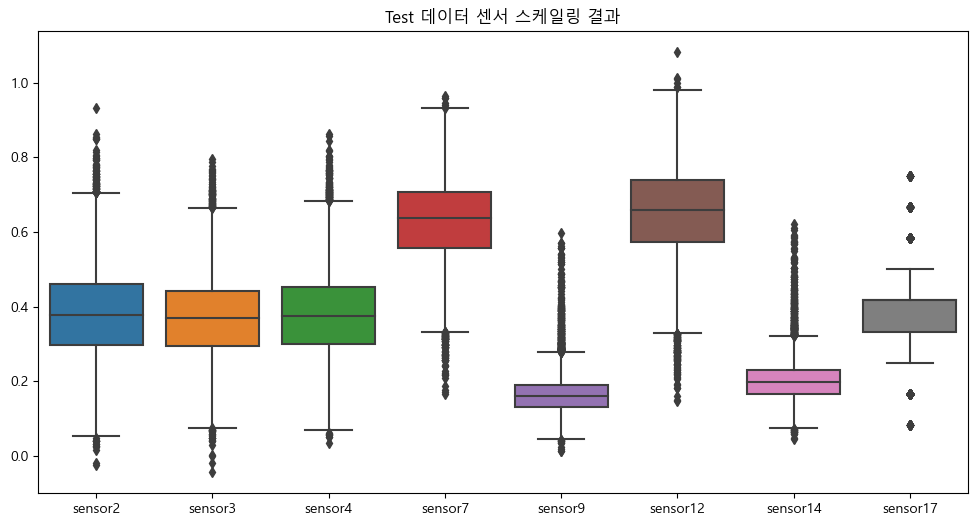

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=test_scaled[selected_features])
plt.title("Test 데이터 센서 스케일링 결과")
plt.show()

## 노이즈 추가

| 노이즈 종류             | 발생 상황        | 삽입 특징            | 기대 효과        |
| ------------------ | ------------ | ---------------- | ------------ |
| 60Hz 진동 간섭         | 전기 모터, 산업 설비 | 주기적 사인파 + 미세 노이즈 | 주기 간섭에 강한 모델 |
| 임펄스 충격             | 센서 충격, 순간 이상 | 짧고 강한 스파이크       | 이상치 견고성 향상   |
| Gaussian 노이즈 (SNR) | 일반 백색잡음      | 전체에 고르게 삽입       | 전반적 강건성 향상   |


In [ ]:
# 노이즈 삽입 클래스 import (noise_input.py 기준 노이즈 추가)
from noise_input import RealisticNoiseInjector

# 인스턴스 생성
injector = RealisticNoiseInjector(seed=42)

# 노이즈 삽입할 대상: 스케일링된 train 데이터
train_noisy = train_scaled.copy()

# 노이즈 삽입 대상 센서들 (스케일링 적용했던 센서들)
for sensor in selected_features:
    # ① 진동 + 임펄스 노이즈 먼저 적용
    signal = injector.inject(
        train_scaled[sensor].values,
        include_vibration=True,
        include_impulse=True
    )

    # ② 그 위에 SNR 노이즈 추가 (예: SNR=10dB)
    signal = injector.add_noise_snr(signal, snr_db=10)

    # 결과 반영
    train_noisy[sensor] = signal

# noise_input.py로 노이즈 추가

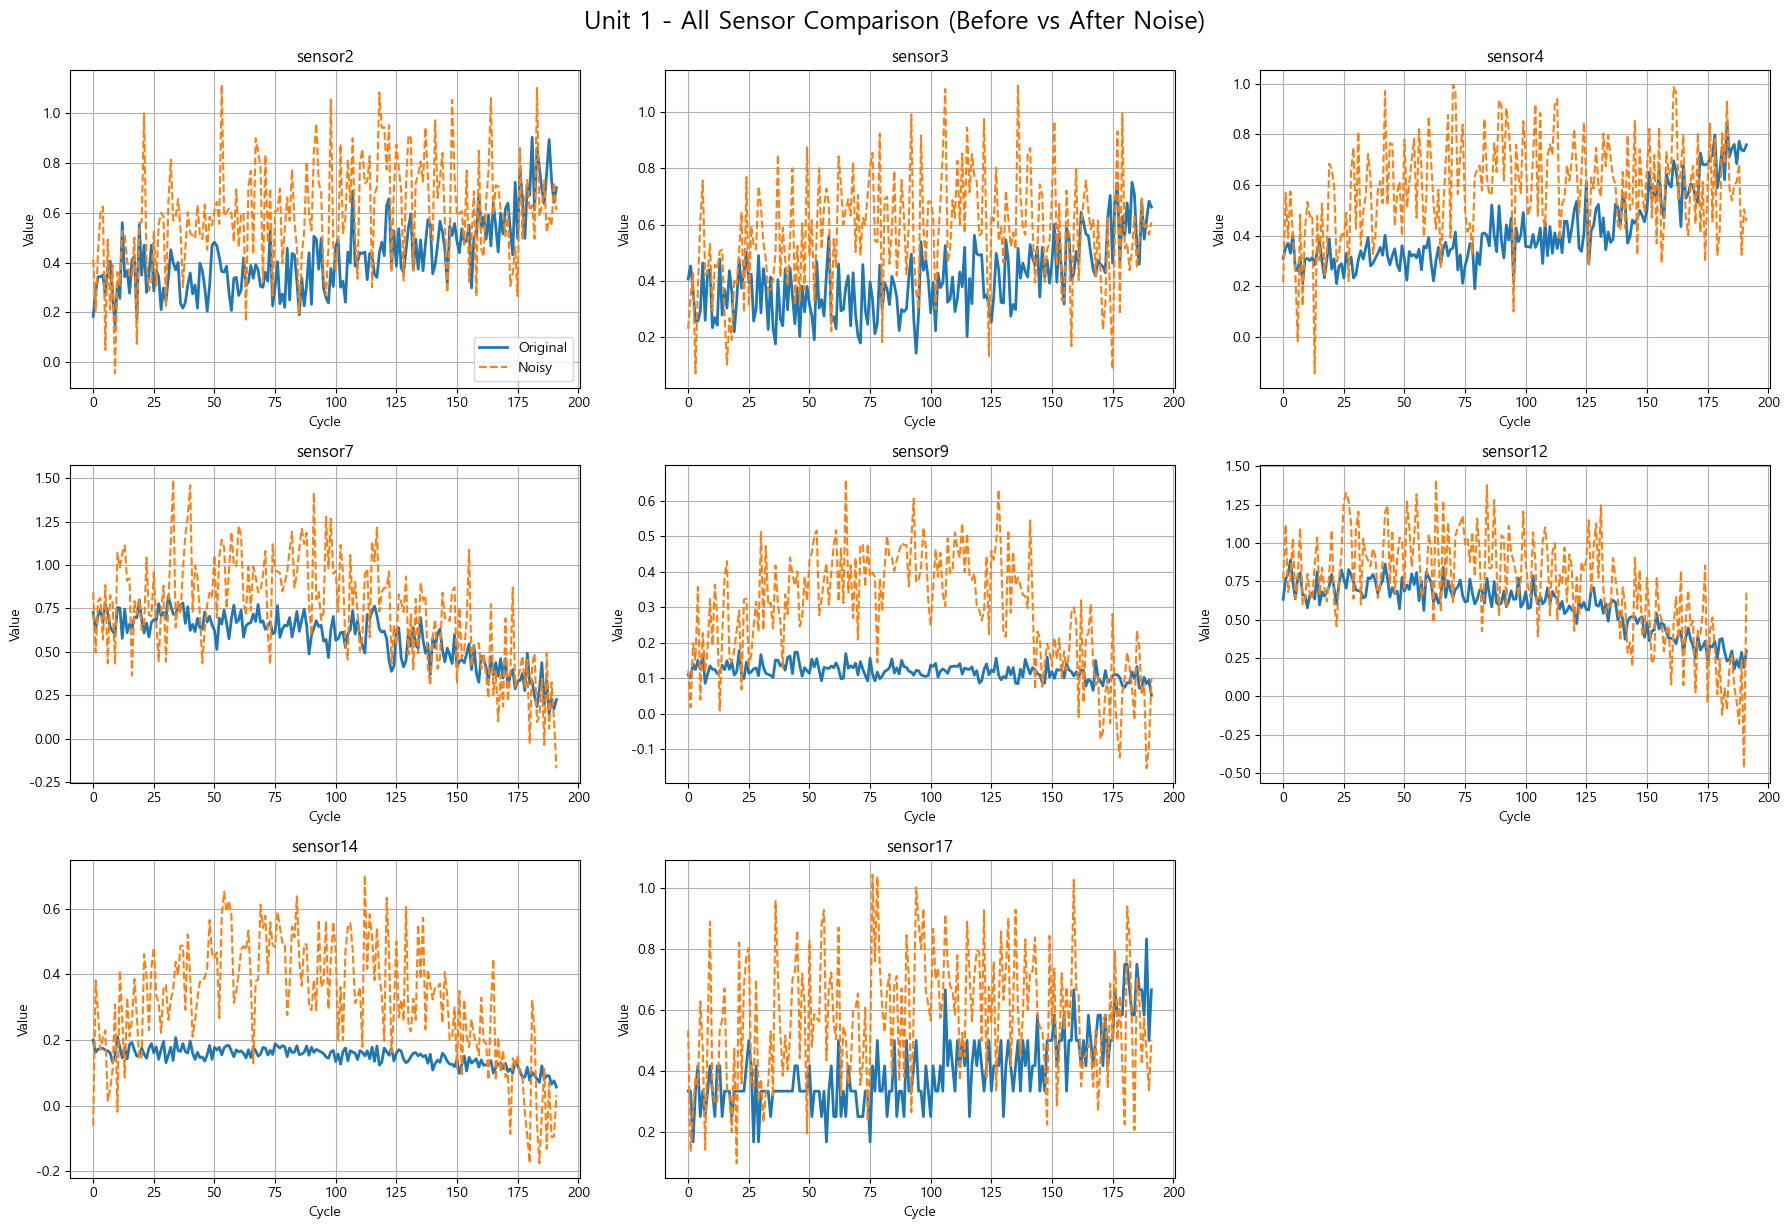

In [65]:
import matplotlib.pyplot as plt

unit_id = 1  # 비교할 유닛 번호

n_sensors = len(selected_features)
n_cols = 3  # 한 줄에 몇 개씩 그릴지
n_rows = (n_sensors + n_cols - 1) // n_cols  # 필요한 줄 수

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, sensor in enumerate(selected_features):
    original = train_scaled[train_scaled['id'] == unit_id][sensor].values
    noisy = train_noisy[train_noisy['id'] == unit_id][sensor].values

    plt.subplot(n_rows, n_cols, i + 1)
    plt.plot(original, label='Original', linewidth=2)
    plt.plot(noisy, label='Noisy', linestyle='--')
    plt.title(sensor)
    plt.xlabel("Cycle")
    plt.ylabel("Value")
    plt.grid(True)
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.suptitle(f"Unit {unit_id} - All Sensor Comparison (Before vs After Noise)", fontsize=18, y=1.02)
plt.show()


## test 유닛의 실제 고장 시점(rul_failed) 계산

In [ ]:
# remaining_cycle 생성
# 1. test RUL 파일에 id 붙이기
rul['id'] = rul.index + 1   # 1부터 100까지 유닛 ID

# 2. test의 각 id별 마지막 cycle 가져오기
last_cycle = test.groupby('id')['cycle'].max().reset_index()
last_cycle.columns = ['id', 'last_cycle']

# 3. 고장 시점 = 마지막 cycle + 남은 RUL
rul = rul.merge(last_cycle, on='id')
rul['rul_failed'] = rul['RUL'] + rul['last_cycle']   # # 실제 고장 시점

# 4. test 데이터에 고장 시점 병합
test = test.merge(rul[['id', 'rul_failed']], on='id', how='left')

# 5. 잔여 수명 컬럼 생성
test['remaining_cycle'] = test['rul_failed'] - test['cycle']


In [70]:
print(test[['id', 'cycle', 'rul_failed', 'remaining_cycle']].head(10))


   id  cycle  rul_failed  remaining_cycle
0   1      1         143              142
1   1      2         143              141
2   1      3         143              140
3   1      4         143              139
4   1      5         143              138
5   1      6         143              137
6   1      7         143              136
7   1      8         143              135
8   1      9         143              134
9   1     10         143              133


### train 데이터에 remaining_cycle 추가

In [ ]:
# remaing_cycle: 각 유닛의 잔여 수명(RUL, Remaining Useful Life)
# train의 각 id별 최대 cycle - 현재 cycle
train['remaining_cycle'] = train.groupby('id')['cycle'].transform('max') - train['cycle']

# 확인
print(train[['id', 'cycle', 'remaining_cycle']].head(10))


# train에서 remaining_cycle = 고장 시점 - 현재 사이클= max(cycle) - current cycle


   id  cycle  remaining_cycle
0   1      1              191
1   1      2              190
2   1      3              189
3   1      4              188
4   1      5              187
5   1      6              186
6   1      7              185
7   1      8              184
8   1      9              183
9   1     10              182
